<a href="https://colab.research.google.com/github/msmsd778/covid19-severity-clustering/blob/main/covid_severity_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import sklearn
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Reading the Data

Next 2 cells is for reading the data from personal google drive.

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Cleaned-Data.csv")
df.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,China


Read the data using the cell below.

In [ ]:
# df = pd.read_csv('Cleaned-Data.csv')
# df.head()

Execute the following cell if you don't have pycaret package installed.

In [ ]:
pip install pycaret

In [4]:
del df['Country']
df.describe()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes
count,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000
mean,0.312500,0.500000,0.562500,0.500000,0.312500,0.062500,0.363636,0.545455,0.545455,0.363636,0.090909,0.200000,0.200000,0.200000,0.200000,0.200000,0.333333,0.333333,0.333333,0.250000,0.250000,0.250000,0.250000,0.333333,0.333333,0.333333
std,0.463513,0.500001,0.496079,0.500001,0.463513,0.242062,0.481046,0.497930,0.497930,0.481046,0.287480,0.400001,0.400001,0.400001,0.400001,0.400001,0.471405,0.471405,0.471405,0.433013,0.433013,0.433013,0.433013,0.471405,0.471405,0.471405
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.500000,1.000000,0.500000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.250000,0.250000,0.250000,0.250000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.drop_duplicates()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes
0,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1
1,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0
2,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0
3,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31675,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0
31676,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0
31677,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1
31678,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0


# Data Visaulization

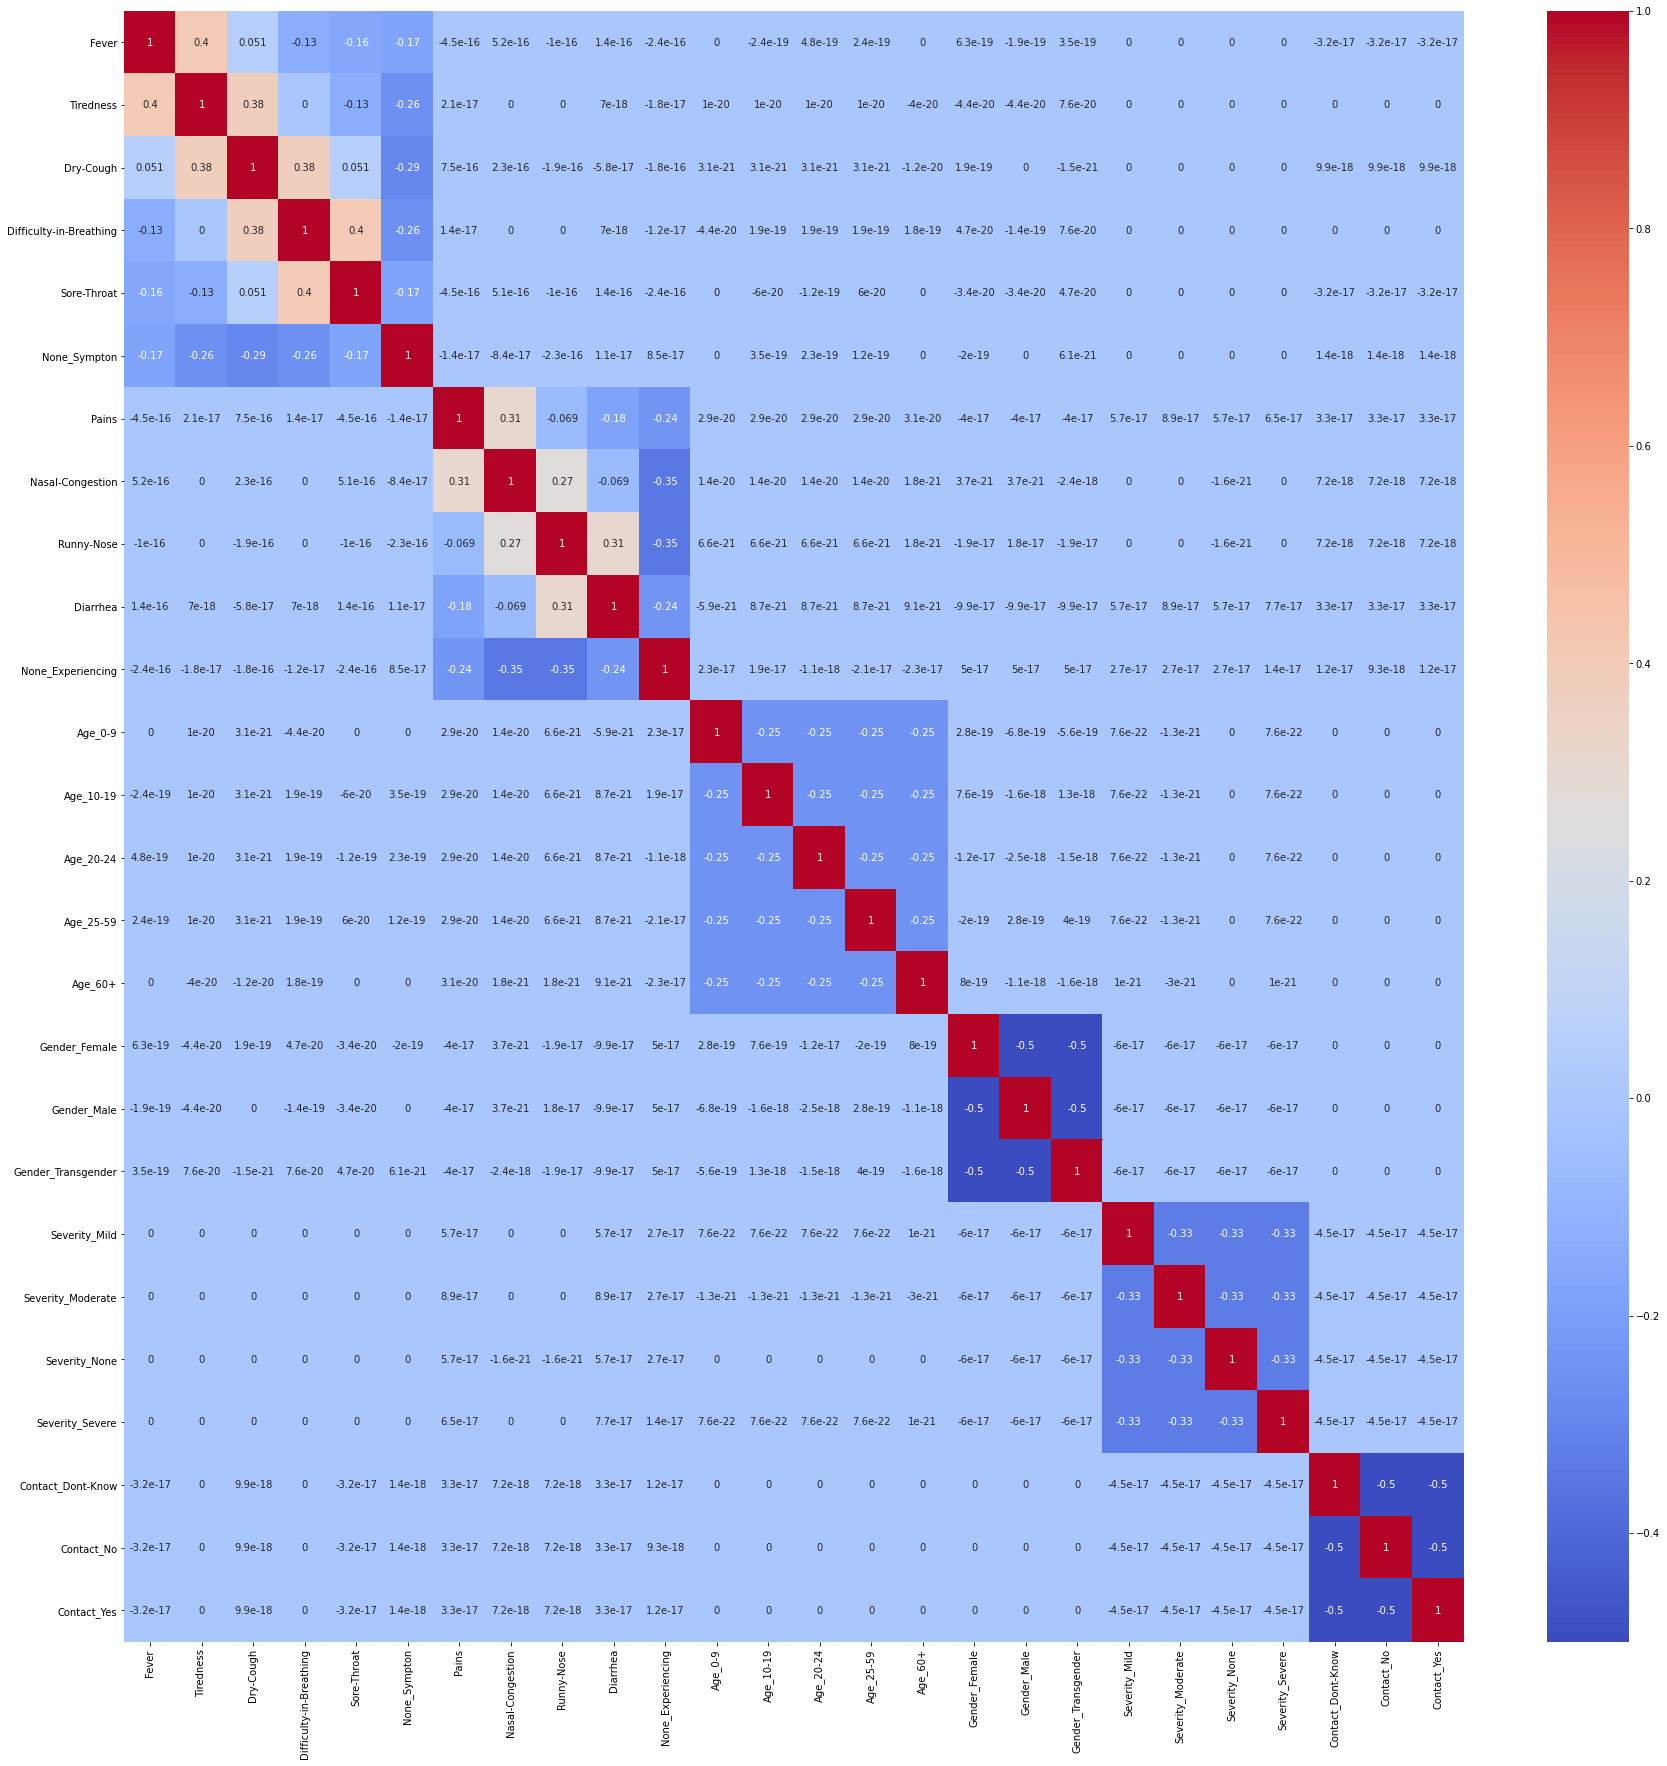

In [ ]:
figure = plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True, cmap='coolwarm')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe0961c7ad0>,
      dtype=object)

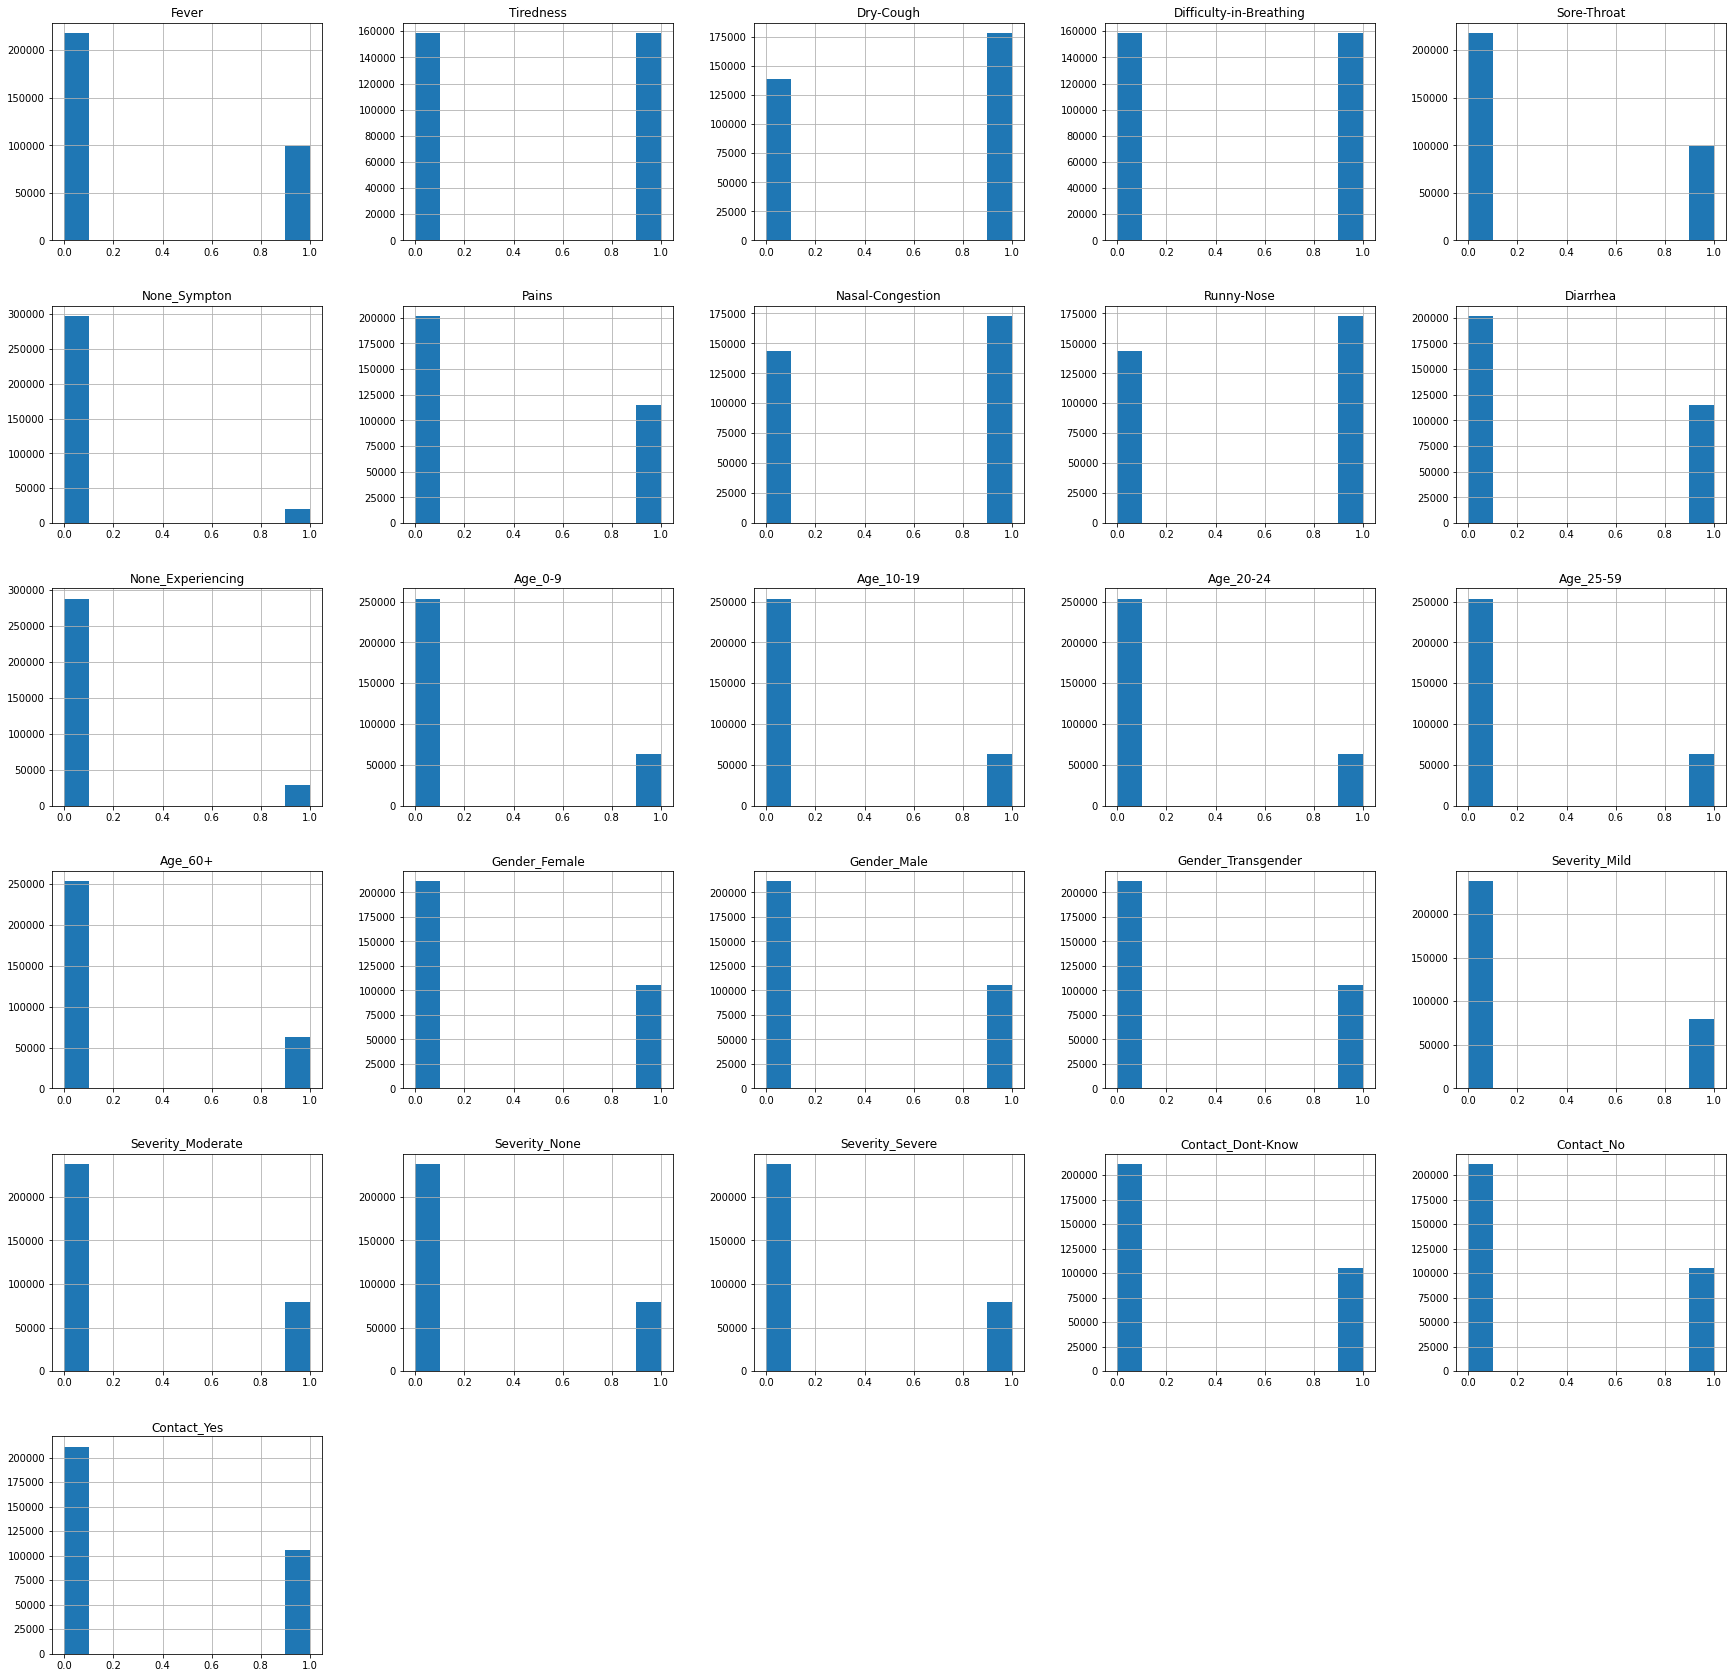

In [ ]:
df.hist(figsize=(30,30))

# Data Standardization

In [ ]:
df.columns

Index(['Fever', 'Tiredness', 'Dry-Cough', 'Difficulty-in-Breathing',
       'Sore-Throat', 'None_Sympton', 'Pains', 'Nasal-Congestion',
       'Runny-Nose', 'Diarrhea', 'None_Experiencing', 'Age_0-9', 'Age_10-19',
       'Age_20-24', 'Age_25-59', 'Age_60+', 'Gender_Female', 'Gender_Male',
       'Gender_Transgender', 'Severity_Mild', 'Severity_Moderate',
       'Severity_None', 'Severity_Severe', 'Contact_Dont-Know', 'Contact_No',
       'Contact_Yes'],
      dtype='object')

# Data Preparation for Analysis

In [6]:
train_df=df.copy()

In [ ]:
scaler = StandardScaler()
train_df_scaled = scaler.fit_transform(train_df)

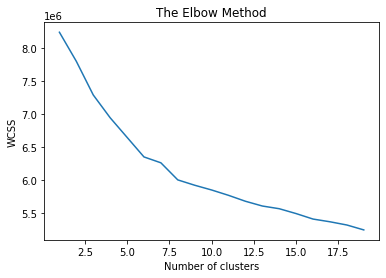

In [ ]:
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(train_df_scaled)
    wcss.append(kmeans.inertia_)


plt.plot(range(1, 20), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# KMeans Clustering

In [ ]:
# loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
km_model=KMeans(n_clusters=7, random_state=42)
km_model.fit(train_df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [ ]:
labels=km_model.labels_

In [ ]:
import pickle
filename = 'clustered_model.sav'
covid_df = pd.DataFrame(km_model.cluster_centers_, columns=train_df.columns)
pickle.dump(km_model, open(filename, 'wb'))
covid_df

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes
0,-0.674200,-1.000000,-1.133893,-1.000000,-0.674200,3.872983,4.305247e-16,-3.224343e-16,4.303236e-16,5.375961e-17,5.385675e-16,-6.879913e-17,2.312965e-20,2.312965e-20,1.301148e-17,1.708650e-17,2.224358e-15,-2.141132e-16,-2.150763e-16,-6.938894e-20,-2.312965e-20,-7.396861e-17,-2.312965e-20,7.401487e-17,7.401487e-17,7.401487e-17
1,0.044947,0.066667,0.075593,0.066667,0.044947,-0.258199,3.502522e-16,-1.075370e-16,3.633214e-16,6.053309e-17,2.422987e-16,2.000000e+00,-5.000000e-01,-5.000000e-01,-5.000000e-01,-5.000000e-01,-4.714559e-15,8.257016e-15,8.036490e-15,-1.705519e-20,6.775351e-21,-3.707332e-17,-7.008984e-22,7.401487e-17,7.401487e-17,7.401487e-17
2,0.044947,0.066667,0.075593,0.066667,0.044947,-0.258199,4.305995e-16,-3.227931e-16,4.305329e-16,5.380446e-17,5.383881e-16,-5.000000e-01,-5.000000e-01,-5.000000e-01,2.000000e+00,-5.000000e-01,-4.714559e-15,7.878658e-15,7.878532e-15,-2.453144e-20,-8.177148e-21,-7.399851e-17,-8.177148e-21,7.401487e-17,7.401487e-17,7.401487e-17
3,0.044947,0.066667,0.075593,0.066667,0.044947,-0.258199,1.883503e-16,8.101404e-17,3.497371e-16,-3.363401e-17,2.556513e-16,-5.000000e-01,-5.000000e-01,2.000000e+00,-5.000000e-01,-5.000000e-01,1.163905e-14,1.534229e-14,1.534123e-14,3.154043e-20,-1.191527e-20,-1.850232e-17,-1.191527e-20,3.535534e-01,-7.071068e-01,3.535534e-01
4,0.044947,0.066667,0.075593,0.066667,0.044947,-0.258199,4.305995e-16,-3.227931e-16,4.305329e-16,5.380446e-17,5.383881e-16,-5.000000e-01,2.000000e+00,-5.000000e-01,-5.000000e-01,-5.000000e-01,-4.714559e-15,7.878658e-15,7.878532e-15,-2.453144e-20,-8.177148e-21,-7.399851e-17,-8.177148e-21,7.401487e-17,7.401487e-17,7.401487e-17
5,0.044947,0.066667,0.075593,0.066667,0.044947,-0.258199,4.305995e-16,-3.227931e-16,4.305329e-16,5.380446e-17,5.383881e-16,-5.000000e-01,-5.000000e-01,-5.000000e-01,-5.000000e-01,2.000000e+00,-4.714559e-15,7.878658e-15,7.878532e-15,-2.453144e-20,-8.177148e-21,-7.399851e-17,-8.177148e-21,7.401487e-17,7.401487e-17,7.401487e-17
6,0.044947,0.066667,0.075593,0.066667,0.044947,-0.258199,-5.393623e-17,1.616678e-16,1.882725e-16,-1.348178e-17,-1.884828e-16,-5.000000e-01,-5.000000e-01,2.000000e+00,-5.000000e-01,-5.000000e-01,1.565491e-15,-1.599821e-14,-1.600204e-14,-2.453144e-20,-2.312965e-20,-1.850232e-17,-3.434402e-20,-7.071068e-01,1.414214e+00,-7.071068e-01


***It appears that those from the sixth cluster do not have Covid disease***

In [ ]:
exp_name = setup(train_df)

,Description,Value
0,session_id,5931
1,Original Data,"(316800, 26)"
2,Missing Values,False
3,Numeric Features,0
4,Categorical Features,26
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(316800, 52)"
9,CPU Jobs,-1


In [ ]:
kmeans_df = assign_model(km_model)
kmeans_df.sample(10)

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Cluster
238199,0,0,0,1,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,Cluster 3
204908,1,1,1,1,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,Cluster 3
209924,0,1,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,Cluster 2
302690,0,1,1,1,1,0,1,1,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,Cluster 3
191746,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,Cluster 1
53906,0,1,0,0,0,0,0,1,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,Cluster 2
229065,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,Cluster 4
176557,0,0,1,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,Cluster 6
90260,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,Cluster 5
70198,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,Cluster 4


# PCA Projection

In [ ]:
pca = PCA(n_components=3)
x = pca.fit_transform(train_df_scaled)
maindf = pd.DataFrame(data=x, columns=['PCA1', 'PCA2', 'PCA3'])

In [ ]:
maindf

,PCA1,PCA2,PCA3
0,-2.136863,-1.907214,-0.141547
1,-2.139674,-1.857011,-0.080133
2,-2.119768,-2.016583,-0.220019
3,-2.179456,-1.762232,-0.109246
4,-2.182267,-1.712029,-0.047832
...,...,...,...
316795,3.772444,3.473945,0.282505
316796,3.792350,3.314373,0.142619
316797,3.732101,3.560490,0.253324
316798,3.729290,3.610693,0.314738


In [ ]:
labels

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [ ]:
maindf2 = pd.concat([maindf, pd.DataFrame({"Cluster":labels})],axis=1)
maindf2.sample(10)

,PCA1,PCA2,PCA3,Cluster
6408,-2.064652,0.311635,0.019846,4
91193,-0.825647,0.999390,-2.017969,5
306875,1.158018,0.176646,-1.373346,2
197954,0.629061,-0.364680,0.043954,4
100685,-0.284917,0.251626,0.910608,1
304772,1.185955,0.499845,-1.349586,2
35352,0.528558,0.682604,-0.048515,1
66503,-0.292140,0.153742,-1.083631,1
74877,-0.282525,-0.109149,-0.725977,4
283305,-0.796476,0.014044,-1.904436,5


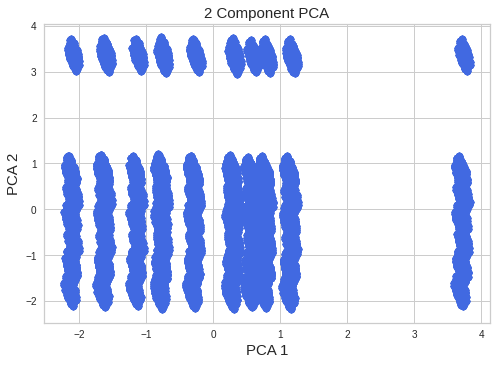

In [ ]:
plt.figure()

plt.xlabel('PCA 1', fontsize = 15)
plt.ylabel('PCA 2', fontsize = 15)
plt.title('2 Component PCA', fontsize = 15)

plt.scatter(maindf['PCA1'], maindf['PCA2'], c='royalBlue', s = 50)

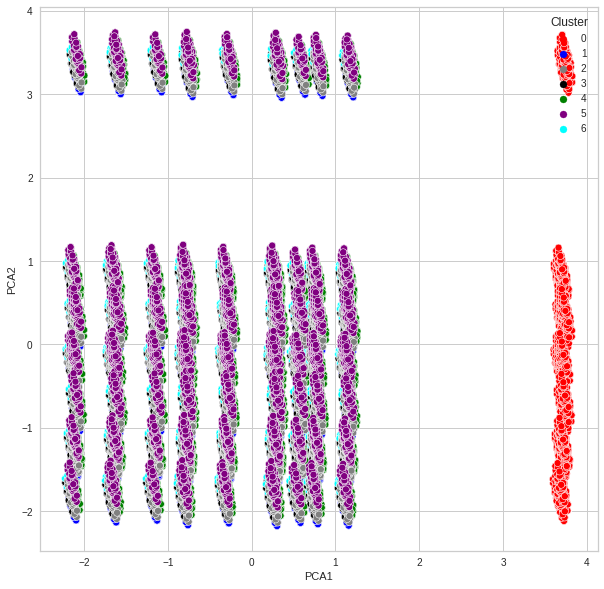

In [ ]:
plt.figure(figsize=(10,10))
ax=sns.scatterplot(x='PCA1',y='PCA2',hue="Cluster",data=maindf2, palette=['red', 'blue', 'grey', 'black', 'green', 'purple', 'cyan'])
plt.show()

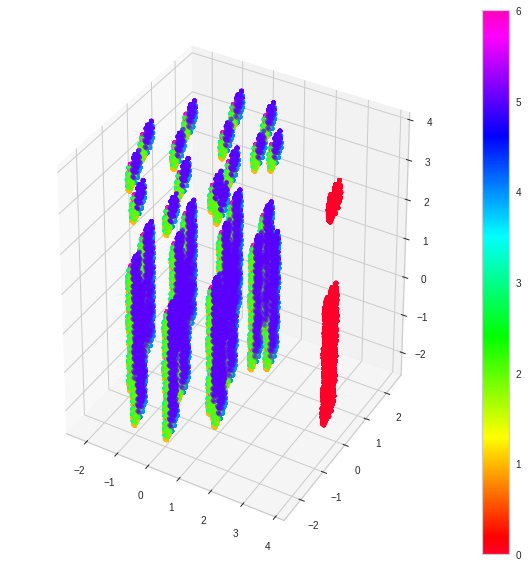

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
sc=ax.scatter(xs=maindf2['PCA1'],ys=maindf2['PCA3'],zs=maindf2['PCA2'],c=maindf2['Cluster'],marker='o',cmap="gist_rainbow")
plt.colorbar(sc)
plt.show()

# Model Evaluation

## Elbow Method

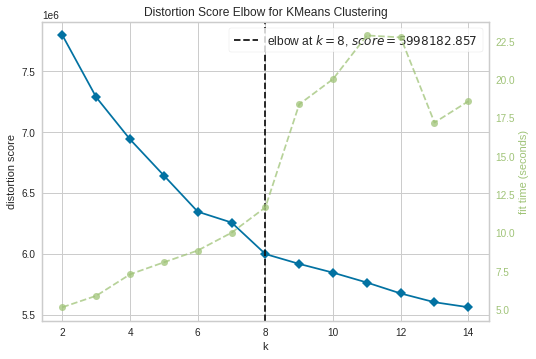

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
model = km_model
visualizer = KElbowVisualizer(model, k=(2,15), timings= True)
visualizer.fit(train_df_scaled)
visualizer.show()

## Davies-Bouldin Index

In [ ]:
from sklearn import metrics

bouldin_score=[]

for i in range(2,15):
    km=KMeans(n_clusters=i, random_state=42)
    labels=km.fit_predict(train_df_scaled)
    bouldin_score.append(metrics.davies_bouldin_score(train_df_scaled, labels))

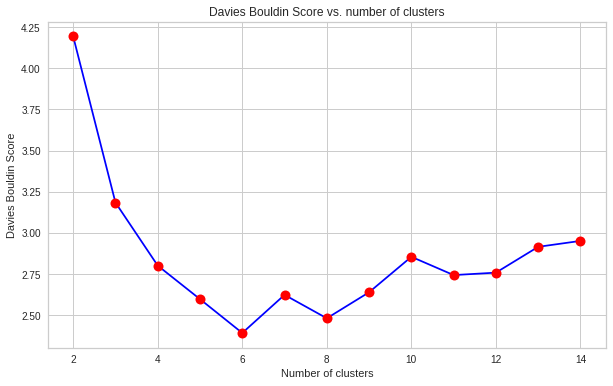

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(2,15), bouldin_score, color='blue', marker='o', markerfacecolor='red', markersize=10)
plt.title('Davies Bouldin Score vs. number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Davies Bouldin Score')
plt.show()

## Silhouette Coefficient

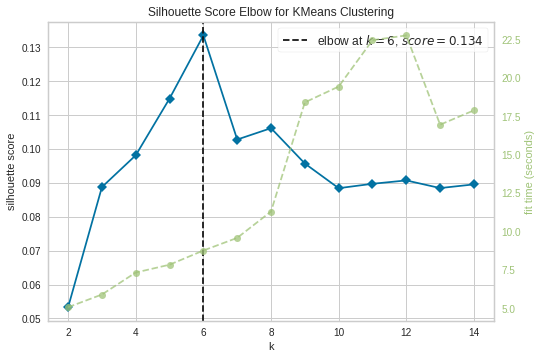

In [ ]:
model = km_model
visualizer = KElbowVisualizer(model, k=(2,15),metric='silhouette', timings= True)
visualizer.fit(train_df_scaled)
visualizer.show()

## Calinski-Harabasz Index

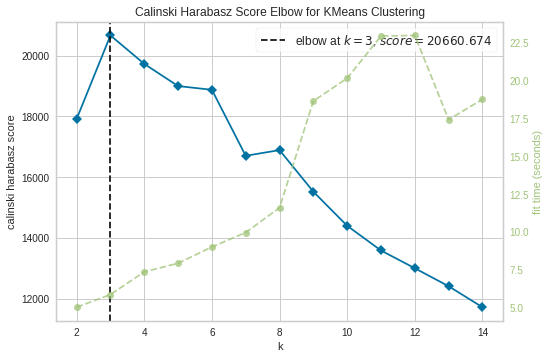

In [ ]:
model = km_model
visualizer = KElbowVisualizer(model, k=(2,15),metric='calinski_harabasz', timings= True)
visualizer.fit(train_df_scaled)
visualizer.show()

# Genetic Algorithm

In [ ]:
pip install pyclustering

In [ ]:
from sklearn import preprocessing

x = train_df.values #returns a numpy array
min_max_scaler = preprocessing.StandardScaler()
x_scaled = min_max_scaler.fit_transform(x)
# x_scaled = preprocessing.StandardScaler().fit_transform(x_scaled)
normalized_df = pd.DataFrame(x_scaled)
normalized_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,1.48324,1.0,0.881917,1.0,1.48324,-0.258199,1.322876,0.912871,0.912871,1.322876,-0.316228,2.0,-0.5,-0.5,-0.5,-0.5,-0.707107,1.414214,-0.707107,1.732051,-0.577350,-0.57735,-0.57735,-0.707107,-0.707107,1.414214
1,1.48324,1.0,0.881917,1.0,1.48324,-0.258199,1.322876,0.912871,0.912871,1.322876,-0.316228,2.0,-0.5,-0.5,-0.5,-0.5,-0.707107,1.414214,-0.707107,1.732051,-0.577350,-0.57735,-0.57735,-0.707107,1.414214,-0.707107
2,1.48324,1.0,0.881917,1.0,1.48324,-0.258199,1.322876,0.912871,0.912871,1.322876,-0.316228,2.0,-0.5,-0.5,-0.5,-0.5,-0.707107,1.414214,-0.707107,1.732051,-0.577350,-0.57735,-0.57735,1.414214,-0.707107,-0.707107
3,1.48324,1.0,0.881917,1.0,1.48324,-0.258199,1.322876,0.912871,0.912871,1.322876,-0.316228,2.0,-0.5,-0.5,-0.5,-0.5,-0.707107,1.414214,-0.707107,-0.577350,1.732051,-0.57735,-0.57735,-0.707107,-0.707107,1.414214
4,1.48324,1.0,0.881917,1.0,1.48324,-0.258199,1.322876,0.912871,0.912871,1.322876,-0.316228,2.0,-0.5,-0.5,-0.5,-0.5,-0.707107,1.414214,-0.707107,-0.577350,1.732051,-0.57735,-0.57735,-0.707107,1.414214,-0.707107


In [ ]:
mydf = pd.DataFrame(normalized_df)
mydf.to_csv('mydata.csv', header=False, index=False)
mydf = pd.read_csv('mydata.csv')

In [ ]:
import csv
csv_file = open("mydata.csv", "r")
txt_file = open('mydata.txt', "w")
for row in csv.reader(csv_file):
    for i in range (len(row)):
        txt_file.write(row[i] + ' ')
    txt_file.write('\n')

In [ ]:
from pyclustering.cluster.ga import genetic_algorithm, ga_observer
from pyclustering.utils import read_sample
from pyclustering.samples.definitions import SIMPLE_SAMPLES
# Read input data for clustering
sample = read_sample("mydata.txt")
# Create instance of observer that will collect all information:
observer_instance = ga_observer(True, True, True)
# Create genetic algorithm for clustering
ga_instance = genetic_algorithm(data=sample, count_clusters=7, chromosome_count=100, population_count=200, count_mutation_gens=1, crossover_rate=80)
# Start processing
ga_instance.process()
# Obtain results
clusters = ga_instance.get_clusters()
# Print cluster to console
print("Amount of clusters: '%d'. Clusters: '%s'" % (len(clusters), clusters))

In [ ]:
pip install kmodes

In [ ]:
from kmodes.kmodes import KModes

data = train_df

km = KModes(n_clusters=7, init='Huang', n_init=5, verbose=1)

clusters = km.fit_predict(data)

# Print the cluster centroids
print(km.cluster_centroids_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 108591, cost: 1949250.0
Run 1, iteration: 2/100, moves: 13208, cost: 1949250.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 118510, cost: 1915000.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 101293, cost: 1899300.0
Run 3, iteration: 2/100, moves: 10734, cost: 1899300.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 111690, cost: 1895650.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 124949, cost: 1944200.0
Run 5, iteration: 2/100, moves: 2099, cost: 1944200.0
Best run was number 4
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0]
 [0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 1 1 0 0 

In [ ]:
import pickle
filename = 'clustered_model2.sav'
km = pickle.load(open(filename, 'rb'))

In [ ]:
import pickle
filename = 'clustered_model2.sav'
covid_df = pd.DataFrame(km.cluster_centroids_, columns=train_df.columns)
pickle.dump(km, open(filename, 'wb'))
covid_df

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,0,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
5,1,1,1,1,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
6,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1


In [ ]:
from pycaret.clustering import *

exp_name = setup(train_df)

,Description,Value
0,session_id,373
1,Original Data,"(316800, 26)"
2,Missing Values,False
3,Numeric Features,0
4,Categorical Features,26
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(316800, 52)"
9,CPU Jobs,-1


In [ ]:
kmodes_df = assign_model(km)
kmodes_df.sample(10)

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Cluster
163118,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,Cluster 0
257585,0,0,0,0,0,1,0,1,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,Cluster 2
28344,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,Cluster 2
65156,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,Cluster 0
120136,0,0,0,0,1,0,1,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,Cluster 6
258774,0,1,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,Cluster 2
82241,0,0,0,0,0,1,1,1,1,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,Cluster 0
266241,1,1,1,1,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,Cluster 5
225341,0,0,1,0,0,0,1,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,Cluster 2
142600,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,Cluster 3


In [ ]:
pca = PCA(n_components=3)
x = pca.fit_transform(train_df)
maindf = pd.DataFrame(data=x, columns=['PCA1', 'PCA2', 'PCA3'])
maindf

,PCA1,PCA2,PCA3
0,-1.092072,0.040505,-0.933576
1,-1.097785,0.041116,-0.935826
2,-1.088429,0.021678,-0.927636
3,-1.074050,0.020428,-0.926399
4,-1.079763,0.021039,-0.928650
...,...,...,...
316795,1.170107,-0.041995,1.132894
316796,1.179463,-0.061433,1.141084
316797,1.135876,0.001628,1.127186
316798,1.130163,0.002240,1.124936


In [ ]:
labels = km.labels_

In [ ]:
maindf2 = pd.concat([maindf, pd.DataFrame({"Cluster":labels})],axis=1)
maindf2.sample(10)

,PCA1,PCA2,PCA3,Cluster
194574,-0.335006,0.988478,-0.920526,6
200300,0.479004,-0.529267,-0.651154,2
45128,-0.831583,-0.469631,0.584957,4
5893,0.234166,-1.007994,-0.026965,1
37451,0.320560,0.006845,-0.022724,0
253383,1.157229,-0.047747,0.232209,0
305977,0.717020,-0.471316,-0.943097,1
271673,-0.133806,-0.525178,-0.649915,6
26382,-0.155989,0.532912,0.569899,1
250541,-0.173060,-0.526604,-0.918591,2


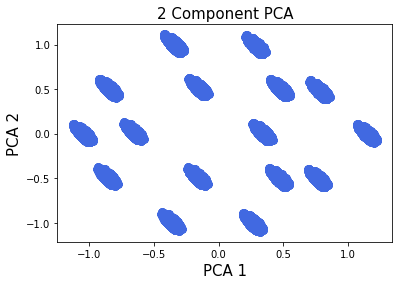

In [ ]:
plt.figure()

plt.xlabel('PCA 1', fontsize = 15)
plt.ylabel('PCA 2', fontsize = 15)
plt.title('2 Component PCA', fontsize = 15)

plt.scatter(maindf['PCA1'], maindf['PCA2'], c='royalBlue', s = 50)

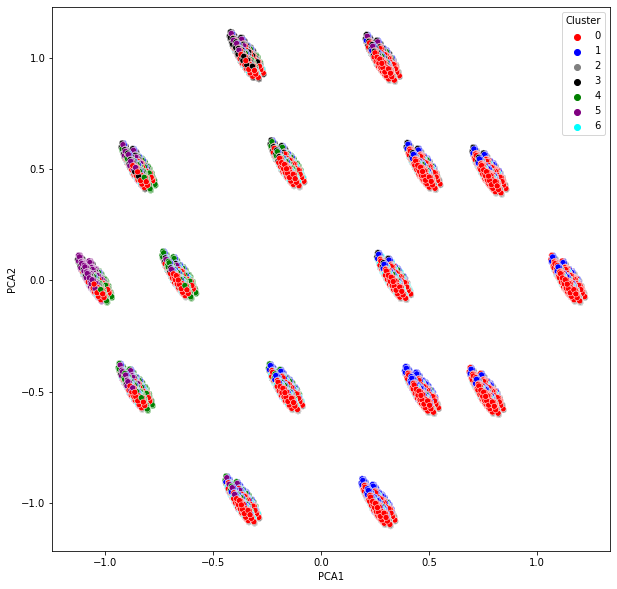

In [ ]:
plt.figure(figsize=(10,10))
ax=sns.scatterplot(x='PCA1',y='PCA2',hue="Cluster",data=maindf2, palette=['red', 'blue', 'grey', 'black', 'green', 'purple', 'cyan'])
plt.show()

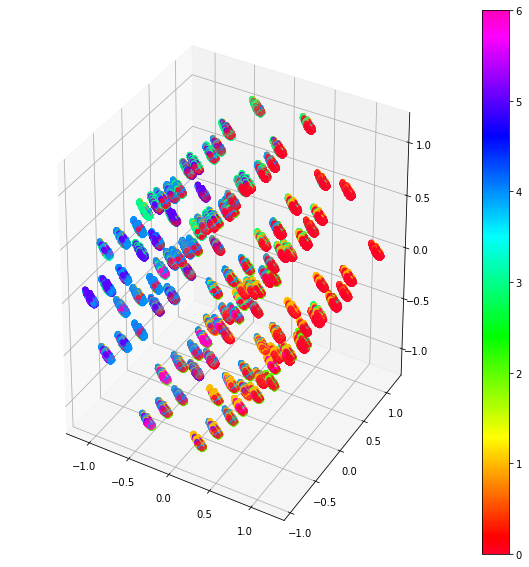

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
sc=ax.scatter(xs=maindf2['PCA1'],ys=maindf2['PCA3'],zs=maindf2['PCA2'],c=maindf2['Cluster'],marker='o',cmap="gist_rainbow")
plt.colorbar(sc)
plt.show()

In [32]:
Data = train_df.sample(1000).to_numpy()
Data

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [1, 1, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 0, 0]])

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 317, cost: 6754.0
Run 1, iteration: 2/100, moves: 16, cost: 6754.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 276, cost: 6712.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 372, cost: 6597.0
Run 3, iteration: 2/100, moves: 12, cost: 6597.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 267, cost: 6626.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 298, cost: 6699.0
Run 5, iteration: 2/100, moves: 104, cost: 6696.0
Run 5, iteration: 3/100, moves: 29, cost: 6696.0
Best run was number 3
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 361, cost: 6559.0
R

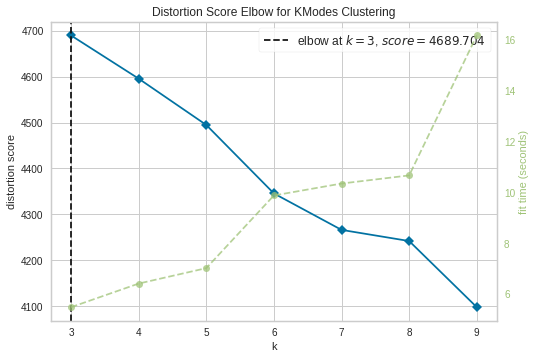

In [48]:
from yellowbrick.cluster import KElbowVisualizer
model = km2
visualizer = KElbowVisualizer(model, k=(3,10), timings= True)
visualizer.fit(Data)
visualizer.show()

In [41]:
import numpy as np
import urllib
import math
import random
import time

from sklearn import preprocessing
from collections import defaultdict
from fractions import Fraction 

def dissimilarityMeasure(X, Y): 
	""" Simple matching disimilarity measure """
	return np.sum(X!=Y, axis = 0)
	
def separation(centroids, membership_mat, no_clusters):

	membership_clusters=numpy.tile(0.0, (no_clusters, no_clusters))

	for i, centre in enumerate(individual):
		for j, point in enumerate(individual):
			su=0.0
			k=0
			if i!=j:
				while k < no_clusters:
					if j!=k:
						su+=math.pow((((scipy.spatial.distance.hamming(individual[j],individual[i])))/((scipy.spatial.distance.hamming(data[j],centre[k])))),(2/(m-1)))
					k+=1

				if su!=0.0:
					membership_clusters[i][j]=1/float(su)
	
	# Calculating sep
	sep=0.0
	for i, c1 in enumerate(individual):
		sum2=0.0
		for j, c2 in enumerate(individual):
			if j!=i:
				sum2+=(math.pow(membership_clusters[i][j],m)*scipy.spatial.distance.hamming(individual[i],individual[j]))
		sep+=sum2


"""Compactness or CostFunction"""
def costFunction(membership_mat, n_clusters, n_points, alpha, centroids, X_Features):
	
	cost_function = 0.0
	
	for k in range(n_clusters):
		temp = 0.0
		denom = 0.0
		for i in range(n_points):
			temp += np.power(membership_mat[i][k], alpha)*dissimilarityMeasure(X_Features[i], centroids[k])
			denom += np.power(membership_mat[i][k], alpha)
		temp = temp/denom
		cost_function += temp

	return cost_function

def updateMatrix(centroids, X_Features, n_points, n_clusters, n_attributes, alpha):

	exp = 1/(float(alpha - 1))
	for x in range(n_clusters):
		centroid = centroids[x]
		for y in range(n_points):
			
			hammingDist = dissimilarityMeasure(centroid, X_Features[y])
			numerator = np.power(hammingDist, exp)
			denom = 0.0
			flag = 0
			
			for z in range(n_clusters):
				if (centroids[z] == X_Features[y]).all() and (centroids[z] == centroid).all():
					membership_mat[y][x] = 1
					flag = 1
					break
				elif (centroids[z] == X_Features[y]).all():
					membership_mat[y][x] = 0
					flag = 1
					break

				denom += np.power(dissimilarityMeasure(centroids[z], X_Features[y]), exp)
		
			if flag == 0:
				membership_mat[y][x] = 1/(float(numerator)/float(denom))	 	 
			
	for row in range(len(membership_mat)):
			membership_mat[row] = membership_mat[row]/sum(membership_mat[row])

	cost_function = costFunction(membership_mat, n_clusters, n_points, alpha, centroids, X_Features)
	return membership_mat, cost_function


def calculateCentroids(membership_mat, X_Features, alpha):

	n_points, n_attributes = X_Features.shape
	n_clusters = membership_mat.shape[1]

	WTemp = np.power(membership_mat, alpha)
	centroids = np.zeros((n_clusters,n_attributes))

	for z in range(n_clusters):
		for x in range(n_attributes):
			freq = defaultdict(int)
			for y in range(n_points):
				freq[X_Features[y][x]] += WTemp[y][z]

			centroids[z][x] = max(freq, key = freq.get)
	
	centroids = centroids.astype(int)

	return centroids

def fuzzyKModes(membership_mat, X_Features, alpha, max_epochs):
	
	n_points, n_clusters = membership_mat.shape
	n_attributes = X_Features.shape[1]

	centroids = np.zeros((n_clusters,n_attributes))
	epochs = 0
	oldCostFunction = 0.0
	costFunction = 0.0

	while(epochs < max_epochs):
		centroids = calculateCentroids(membership_mat, X_Features, alpha)
		membership_mat, costFunction = updateMatrix(centroids, X_Features, n_points, n_clusters, n_attributes, alpha)

		if((oldCostFunction - costFunction)*(oldCostFunction - costFunction) < 0.3):
			break
		epochs += 1
	
	return membership_mat, costFunction

def Selection(chromosomes, n, k):

	"""Rank Based Fitness Assignment"""
	
	#Sort chromosomes for rank based evaluation
	chromosomes = chromosomes[chromosomes[:,n*k].argsort()]
	newChromosomes = np.zeros((n, n*k + 1))

	beta = 0.1
	fitness = np.zeros(n)
	cumProbability = np.zeros(n)

	for i in range(n - 1, 0, -1):
		fitness[i] = beta*(pow((1 - beta), i))

	"""Roulette Wheel Selection"""

	#Cumulative Probability
	for i in range(n):
		if i > 1:
			cumProbability[i] = cumProbability[i-1] 
		cumProbability[i] += fitness[i]
	
	#Random number to pick chromosome
	for i in range(n):
		pick = random.uniform(0,1)

		if pick < cumProbability[0]:
			newChromosomes[i] = chromosomes[0]
		else :	
			for j in range(n - 1):
				if cumProbability[j] < pick and pick < cumProbability[j + 1]:
					newChromosomes[i] = chromosomes[j + 1]
		
		newChromosomes[i][n*k] = 0.0
	
	return newChromosomes

def CrossOver(chromosomes, n, k, X_Features, alpha):

	newChromosomes = np.zeros((n, n * k + 1))
	
	for i in range(n):
		membership_mat = np.reshape(chromosomes[i][0:n*k], (-1, k))
		new_membership_met, cost_function = fuzzyKModes(membership_mat, X_Features, alpha, 1)    #Quick termination, 1 step fuzzy kmodes
		newChromosomes[i][0 : n * k] = new_membership_met.ravel()
		newChromosomes[i][n * k] = cost_function

	return newChromosomes

def Mutation(chromosomes, n_points, n_clusters):

	P = 0.001
	for i in range(n_points):
		chromosome = chromosomes[i][0 : n * k]
		chromosome = np.reshape(chromosome, (-1, n_clusters))

		for j in range(n_points):
			pick = random.uniform(0,1)
			if pick <= P:
				gene = np.random.rand(k)
				gene = gene/sum(gene)
				chromosome[j] = gene

		chromosomes[i][0 : n * k] = chromosome.ravel()

	return chromosomes
	

# load the CSV file as a numpy matrix

X_Features = Data[:, 0:25].astype(int)

k = 7
n = len(X_Features)
n_attributes = X_Features.shape[1]
alpha = 1.2
max_epochs = 100
g_max = 15

populationSize = n
chromosomes = np.zeros((n, n * k + 1))

print ("GA-FKM start")
start_time = time.time()

"""Initialize Population"""
for i in range(populationSize):
	
	membership_mat = np.random.rand(n, k)

	for row in range(len(membership_mat)):
		membership_mat[row] = membership_mat[row]/sum(membership_mat[row])

	chromosomes[i][0 : n * k] = membership_mat.ravel()

	centroids = calculateCentroids(membership_mat, X_Features, alpha)
	chromosomes[i][n*k] = costFunction(membership_mat, k, n, alpha, centroids, X_Features)   #Last column represents the cost function of this chromosome
		
"""Genetic Algorithm K Modes"""
for x in range(g_max):

	"""Best parent of this generation"""
	min_value = 0
	best_parent = chromosomes[0]
	for i in range(populationSize):
		if min_value == 0:
			min_value = chromosomes[i][n*k]

		elif chromosomes[i][n*k] < min_value:
			min_value = chromosomes[i][n*k]
			best_parent = chromosomes[i]
	
	population_after_selection = Selection(chromosomes, n, k)
	population_after_crossover = CrossOver(population_after_selection, n, k, X_Features, alpha)
	chromosomes = Mutation(population_after_crossover, n, k)

	"""Elitism at each generation"""

	max_value = 0
	worst_child_pos = 0
	for i in range(populationSize):
		membership_mat = np.reshape(chromosomes[i][0:n*k], (-1, k))
		centroids = calculateCentroids(membership_mat, X_Features, alpha)
		chromosomes[i][n*k] = costFunction(membership_mat, k, n, alpha, centroids, X_Features)   #Last column represents the cost function of this chromosome
		if max_value == 0:
			max_value = chromosomes[i][n*k]

		elif chromosomes[i][n*k] > max_value:
			max_value = chromosomes[i][n*k]
			worst_child_pos = i

	chromosomes[i] = best_parent

"""Best of the child chromosomes"""
min_value = 0
offspring = chromosomes[0]

for i in range(populationSize):
	if min_value == 0:
		min_value = chromosomes[i][n*k]

	elif chromosomes[i][n*k] < min_value:
		min_value = chromosomes[i][n*k]
		offspring = chromosomes[i]

print ("Final Surviving chromosomes : ", chromosomes)
print ("Final chosen chromosome : ", offspring)
print ("Compactness : ", min_value)

print ("GA-FKM complete")
print ("\n \nTotal time :", time.time() - start_time)

GA-FKM start
Final Surviving chromosomes :  [[ 0.1883081   0.1883081   0.05359776 ...  0.06791662  0.11501739
  47.96120264]
 [ 0.1883081   0.1883081   0.05359776 ...  0.06791662  0.11501739
  47.9628419 ]
 [ 0.1883081   0.1883081   0.05359776 ...  0.06791662  0.11501739
  47.97325993]
 ...
 [ 0.1883081   0.1883081   0.05359776 ...  0.06791662  0.11501739
  47.95324683]
 [ 0.1883081   0.1883081   0.05359776 ...  0.06791662  0.11501739
  47.96551862]
 [ 0.1883081   0.1883081   0.05359776 ...  0.06791662  0.11501739
  47.95154068]]
Final chosen chromosome :  [ 0.1883081   0.1883081   0.05359776 ...  0.06791662  0.11501739
 47.95154068]
Compactness :  47.951540681105826
GA-FKM complete

 
Total time : 23355.735069990158


In [49]:
chromosomes_df = pd.DataFrame(offspring)
chromosomes_df = chromosomes_df.drop(7000)
chromosomes_df = chromosomes_df.to_numpy()
chromosomes_df = chromosomes_df.reshape(1000,7)
chromosomes_df = pd.DataFrame(chromosomes_df)
chromosomes_df.head(100)

,0,1,2,3,4,5,6
0,0.188308,0.188308,0.053598,0.096585,0.188308,0.096585,0.188308
1,0.451958,0.107252,0.107252,0.059517,0.107252,0.059517,0.107252
2,0.107252,0.451958,0.107252,0.059517,0.107252,0.059517,0.107252
3,0.294988,0.294988,0.096662,0.060019,0.096662,0.060019,0.096662
4,0.021586,0.690737,0.021586,0.042085,0.090961,0.042085,0.090961
...,...,...,...,...,...,...,...
95,0.089949,0.089949,0.316023,0.162091,0.089949,0.162091,0.089949
96,0.404097,0.115017,0.115017,0.067917,0.115017,0.067917,0.115017
97,0.041067,0.528121,0.041067,0.069547,0.125326,0.069547,0.125326
98,0.124054,0.435847,0.045484,0.073253,0.124054,0.073253,0.124054


In [ ]:
pip install kmodes

In [37]:
from kmodes.kmodes import KModes

km2 = KModes(n_clusters=7, init='Huang', n_init=5, verbose=1)

clusters = km2.fit_predict(Data)

# Print the cluster centroids
print(km2.cluster_centroids_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 419, cost: 5924.0
Run 1, iteration: 2/100, moves: 146, cost: 5893.0
Run 1, iteration: 3/100, moves: 0, cost: 5893.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 348, cost: 5985.0
Run 2, iteration: 2/100, moves: 65, cost: 5985.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 336, cost: 5967.0
Run 3, iteration: 2/100, moves: 64, cost: 5967.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 422, cost: 6013.0
Run 4, iteration: 2/100, moves: 191, cost: 5928.0
Run 4, iteration: 3/100, moves: 61, cost: 5928.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 404, cost: 6024.0
Run 5, iteration: 2/100, moves: 125, cost: 5971.0
Run 5

In [44]:
from pycaret.clustering import *

exp_name = setup(pd.DataFrame(Data, columns=train_df.columns))

,Description,Value
0,session_id,6876
1,Original Data,"(1000, 26)"
2,Missing Values,False
3,Numeric Features,0
4,Categorical Features,26
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(1000, 52)"
9,CPU Jobs,-1


In [54]:
kmodes_df2 = assign_model(km2)
kmodes_df2.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Cluster
0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,Cluster 1
1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,Cluster 7
2,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,Cluster 1
3,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,Cluster 8
4,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,Cluster 6


In [ ]:
# function KeepClicking(){
# console.log("Clicking");
# document.querySelector("colab-connect-button").click()
# }
# setInterval(KeepClicking,60000)